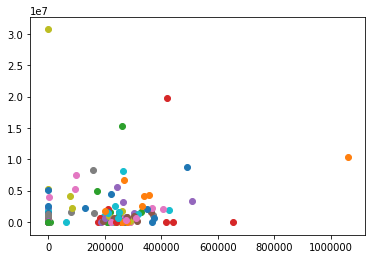

min = 477, max = 1060932
[6680544, 4890344, 651850, 5538001, 493489, 1104054, 5210569, 880290, 2282768, 765313, 2218275, 372205, 1056320, 185063, 1030329, 4346544, 81042, 3285, 1441898, 1465734, 1635238, 98718, 601438, 850477, 664375, 4158995, 1624396, 2027865, 436515, 4046157, 371750, 607837, 1835558, 1624396, 412878, 17378, 3282960, 1623010, 2291113, 1362375, 139130, 2549361, 1637034, 757301, 83237, 506765, 187500, 759557, 1753766, 608750, 9803, 664461, 59539, 7509039, 1599641, 953136, 1451869, 4452476, 343434, 19794175, 850010, 117551, 5266578, 1426469, 886231, 28798, 2022048, 1324578, 1668260, 1297049, 5127155, 1729541, 281073, 431750, 257817, 754966, 4160672, 8191755, 2604490, 825464, 192758, 400478, 636246, 8308552, 30766064, 1550019, 8831913, 10433518, 15364167, 176378, 940257, 671737, 2165172, 591250, 2070306, 2542813, 3181250, 765920, 384728]
 max of exercised_stock_options is 30766064
 min of exercised_stock_options is 3285
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

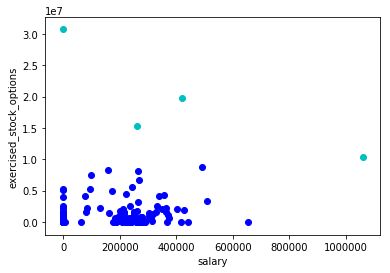

In [102]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
import sys

from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()


### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset_modified.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features) _modified
for f1, f2, f3  in finance_features:
    plt.scatter( f1, f2 )
plt.show()


#eso = numpy.array(finance_features)[:,1]
#eso = eso[eso > 0]
#print "max is {} , min is {}".format(numpy.max(eso),format(numpy.min(eso)))


salaries = filter(lambda x: x != 'NaN', [data_dict[cat]['salary'] for cat in data_dict])
print('min = {}, max = {}'.format(min(salaries), max(salaries)))

exercised_stock_options= [v["exercised_stock_options"] for k,v in data_dict.iteritems() if v["exercised_stock_options"]  != "NaN" ]
print exercised_stock_options
print " max of exercised_stock_options is {}".format(max(exercised_stock_options))
print " min of exercised_stock_options is {}".format(min(exercised_stock_options))


### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2,random_state=0,max_iter=500).fit(finance_features)
pred = clf.predict(finance_features)
print pred
print clf.cluster_centers_
#pred = clf.labels_



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters2.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"